## top , WR * reco

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#from PhysicsTools.NanoAODTools.postprocessing.tools import *
#from PhysicsTools.NanoAODTools.postprocessing.framework.eventloop import Module
#from PhysicsTools.NanoAODTools.postprocessing.framework.datamodel import Collection,Object
#from PhysicsTools.NanoAODTools.postprocessing.framework.postprocessor import PostProcessor
#from PhysicsTools.NanoAODTools.postprocessing.analyser.ID.GenStatus import *
#from PhysicsTools.NanoAODTools.postprocessing.analyser.AnalyserHelper.AnalyserHelper import *
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak



## x 방향이 이벤트 y 방향이 각 입자의 정보 z 방향이 입자들 각각이라 생각하면 될듯?
# 각 층(이벤트)에 입자들이 쭉 있고 거기에 정보가 있다고 생각하면 될듯?

## 일단 보고 싶은 키워드나 주제를 고르면 그게 이벤트 별로 있으면 다 뽑아옴 . 이제 거기서 필터로 걸러내면 모든 이벤트는 해당이 안되고 특정 이벤트만 남으면 거기 안에 들어있는 값 쓰면 됨

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
print(len(events))
keys = events.keys()


pdgid = events["GenPart_pdgId"].array()
mass = events["GenPart_mass"].array()
pt = events["GenPart_pt"].array()
phi = events["GenPart_phi"].array()
eta = events["GenPart_eta"].array()



wmask =(((pdgid == 24) | (pdgid == -24)) & (mass < 100))
bmask = ((pdgid == 5) | (pdgid == -5) )
wmass = mass[wmask]
bmass = mass[bmask]
wpt = pt[wmask]
bpt = pt[bmask]
wphi = phi[wmask]
bphi = phi[bmask]
weta = eta[wmask]
beta = eta[bmask]
# 두 개 이상의 b quark, 하나이상의 W onshell boson만 있는 이벤트만 필터링
valid_events = (ak.num(bpt) >= 2) & (ak.num(wpt) >= 1)

# apply mask
bpt = bpt[valid_events]
bphi = bphi[valid_events]
beta = beta[valid_events]
bmass = bmass[valid_events]
wpt = wpt[valid_events]
wphi = wphi[valid_events]
weta = weta[valid_events]
wmass = wmass[valid_events]


# 벡터 구성
b1 = vector.array({
    "pt": bpt[:, 0],
    "phi": bphi[:, 0],
    "eta": beta[:, 0],
    "mass": bmass[:, 0]
})

b2 = vector.array({
    "pt": bpt[:, 1],
    "phi": bphi[:, 1],
    "eta": beta[:, 1],
    "mass": bmass[:, 1]
})

w1 = vector.array({
    "pt": wpt[:, 0],
    "phi": wphi[:, 0],
    "eta": weta[:, 0],
    "mass": wmass[:, 0]
})

top =  b2 + w1
#print("Top mass (reco from gen parts):", (top.mass), "GeV")
# 히스토그램 그리기
plt.hist(top.mass, bins=100, range=(160, 200), alpha=1.0, label='Top Mass')
wvirtual = b1 + b2 + w1
plt.hist(wvirtual.mass, bins=200, range=(0, 8000), alpha=0.7, label='W Virtual Mass')

#top 갯수
print("Number of top quarks:", len(top.mass))
# wvirtual 갯수
print("Number of W virtual particles:", len(wvirtual.mass))




## Gen jet delta r

1840


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  4.,  4.,  5.,
         6.,  7.,  6.,  4., 11., 12.,  9., 14., 15., 14.,  8., 11., 21.,
        15., 19., 31., 61., 43., 66., 31., 24.,  9., 11.,  5., 10.,  4.,
         3.,  3.,  1.,  3.,  3.,  2.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.1       ,  0.2       ,  0.30000001,  0.40000001,
         0.5       ,  0.60000002,  0.69999999,  0.80000001,  0.89999998,
         1.        ,  1.10000002,  1.20000005,  1.29999995,  1.39999998,
         1.5       ,  1.60000002,  1.70000005,  1.79999995,  1.89999998,
         2.        ,  2.0999999 ,  2.20000005,  2.29999995,  2.4000001 ,
         2.5       ,  2.5999999 ,  2.70000005,  2.79999995,  2.900000

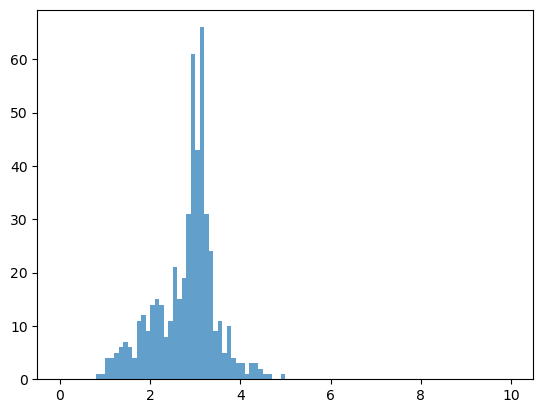

In [6]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
print(len(events))
keys = events.keys()

ak8jetmass = events["GenJetAK8_mass"].array()
ak8flavor = events["GenJetAK8_partonFlavour"].array()
ak8eta = events["GenJetAK8_eta"].array()
ak8phi = events["GenJetAK8_phi"].array()
bmask = (ak8flavor == 5) 
notbmask = (ak8flavor != 5)

ak8jetmass_b = ak8jetmass[bmask]
ak8jetmass_notb = ak8jetmass[notbmask]
import matplotlib.pyplot as plt

# 1차원 배열로 flatten (awkward → numpy 변환)
aa = ak.to_numpy(ak.flatten(ak8jetmass_b))
nb = ak.to_numpy(ak.flatten(ak8jetmass_notb))
'''
plt.hist(aa, bins=100, range=(0, 500), alpha=0.9, label="b-quark jets")
plt.hist(nb, bins=100, range=(0, 500), alpha=0.5, label="non-b jets")
plt.xlabel("Jet Mass [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid()
plt.show()
'''
# 조건: GenJetAK8가 2개 이상인 이벤트만
valid = ak.num(ak8jetmass) >= 2
ak8mass = ak8jetmass[valid]
eta = ak8eta[valid]
phi = ak8phi[valid]

# 내림차순 정렬된 인덱스
sorted_idx = ak.argsort(ak8mass, axis=1, ascending=False)

# 인덱스로 정렬된 jet들 얻기
sorted_eta = eta[sorted_idx]
sorted_phi = phi[sorted_idx]

# 가장 큰 두 jet의 eta, phi
eta1 = ak.firsts(sorted_eta)          # leading
eta2 = ak.firsts(ak.drop_none(sorted_eta[:, 1:]))  # subleading

phi1 = ak.firsts(sorted_phi)
phi2 = ak.firsts(ak.drop_none(sorted_phi[:, 1:]))

# ΔR 계산
delta_eta = eta1 - eta2
delta_phi = (phi1 - phi2 + np.pi) % (2 * np.pi) - np.pi
delta_r = np.sqrt(delta_eta**2 + delta_phi**2)

plt.hist(delta_r, bins=100, range=(0, 10), alpha=0.7, label='ΔR between leading jets')


## gen top 골랐을때 둘 중에서 첫번째꺼 사용

## Finding fake ak8 near top

[1.6306744  2.9097733  1.5955853  1.8727498  0.9430994  2.7054276
 1.7090809  1.431173   1.949297   2.131617   3.0076637  2.2893496
 2.038956   2.7068696  1.6295403  2.4668908  3.1306994  2.0989084
 2.9551637  4.698737   1.0182695  3.1194506  1.3011861  2.3916702
 1.3749205  1.899133   1.3497208  2.8392735  1.7098949  1.8410482
 1.9102705  1.986036   1.6757579  2.4297442  2.4258652  1.9625273
 3.3392136  3.0437467  1.5079886  0.8077067  0.8870139  0.9942843
 1.7153565  3.2163572  1.8013672  1.1520325  1.513495   1.584767
 1.4025834  2.623253   2.5033965  1.8522551  2.0307531  4.196431
 1.1023431  1.1830485  3.3763337  1.9893683  2.6681075  2.830835
 2.374306   1.1531507  1.5747147  1.5602564  2.6249154  1.7420878
 2.264198   1.263086   2.7996352  2.7759833  0.6625106  2.1873746
 1.7157849  2.2128794  1.4700117  1.6642625  2.9295964  1.3486397
 1.7989258  2.711706   2.874613   1.7716907  2.8312347  1.6554646
 1.8426702  1.8752825  1.7205304  1.4606538  2.4046123  2.3160474
 2.6040182  1

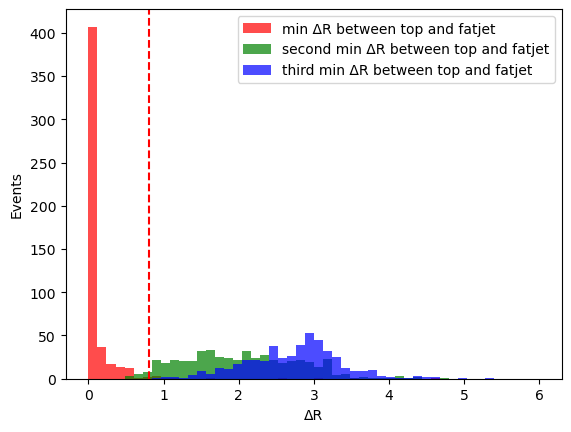

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()



#deltar
dr_total = []
for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    # fatjet
    top_etas = top_eta[i][0]
    
    top_phi = top_phi1[i][0]
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)

    dr = np.sort(dr)  # Sort the ΔR 
    dr_total.append(dr)



# leading ΔR 값만 모아서 1-D 배열로
leading_drs   = np.array([dr[0] if len(dr) else np.nan for dr in dr_total]) # 가장 작은 ΔR 값
nextleading_drs = np.array([dr[1] if len(dr) > 1 else np.nan for dr in dr_total]) #두번째로 작은 ΔR 값
third_drs = np.array([dr[2] if len(dr) > 2 else np.nan for dr in dr_total]) #세번째로 작은 ΔR 값
print(nextleading_drs)
# leading 값을 제거하고 남은 ΔR 배열(길이가 사건마다 달라지므로 그대로 리스트 보존)
remaining_drs = [dr[1:] for dr in dr_total]# 가장 작은 ΔR 값을 제거한 나머지 ΔR 값들

#print(remaining_drs)
flatten_remaining_drs = ak.flatten(remaining_drs)
plt.hist(leading_drs, bins=50, range=(0, 6), alpha=0.7, label='min ΔR between top and fatjet',color = 'red')
plt.hist(nextleading_drs, bins=50, range=(0, 6), alpha=0.7, label='second min ΔR between top and fatjet',color = 'green')
plt.hist(third_drs, bins=50, range=(0, 6), alpha=0.7, label='third min ΔR between top and fatjet',color = 'blue')
#plt.hist(flatten_remaining_drs, bins=50, range=(0, 6), alpha=0.3, label='ΔR between top and fatjet - Highscore toptagger removed', color = 'orange')
plt.xlabel('ΔR')
plt.ylabel('Events')
plt.legend()
plt.axvline(x=0.8, color='red', linestyle='--', label='ΔR = 0.8')
##############################
#####################################






[[5, 5, 0, 0, 0], [5, 5, 0], [5, 5, 0], ..., [0, 5, 5, 5, 0], [5, 5, 0, 0]]
[[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], [], []]


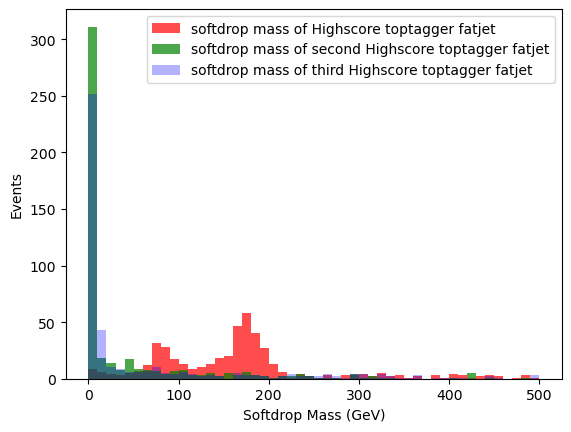

In [3]:

#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

# softdrop mass
fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()


#deltar
dr_total = []

min_idx = []
second_min_idx = []
third_min_idx = []
min_drpmass = []
second_min_drpmass = []
third_min_drpmass = []

for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    # fatjet
    top_etas = top_eta[i][0]
    top_phi = top_phi1[i][0]
    
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)
    if len(dr) >1:
        ## dr 길이가 1보다 크면 두번째로 작은 ΔR 값의 인덱스 저장
        idx = np.argsort(dr)[0]
        min_idx.append(idx)
        drpmass = fatjet_softdrop_mass[i][idx]
        min_drpmass.append(drpmass)

        idx1 = np.argsort(dr)[1]
        second_min_idx.append(idx1)
        drpmass = fatjet_softdrop_mass[i][idx1]
        second_min_drpmass.append(drpmass)
    if len(dr) > 2:
        idx2 = np.argsort(dr)[2]
        third_min_idx.append(idx2)
        drpmass = fatjet_softdrop_mass[i][idx2]
        third_min_drpmass.append(drpmass)

    dr_total.append(dr)

plt.hist(min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of Highscore toptagger fatjet', color='red')
plt.hist(second_min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of second Highscore toptagger fatjet', color='green')
plt.hist(third_min_drpmass, bins=50, range=(0, 500), alpha=0.3, label='softdrop mass of third Highscore toptagger fatjet', color='blue')
plt.xlabel('Softdrop Mass (GeV)')
plt.ylabel('Events')
plt.legend()
#plt.yscale('log')


hadron_flavour = events["FatJet_hadronFlavour"].array()
print(hadron_flavour)
tmask = ((hadron_flavour == 6))
hadron_flavour = hadron_flavour[tmask]
print(hadron_flavour)




In [38]:
print(len(nextleading_drs))
nextleading_drs = nextleading_drs[nextleading_drs<1]
print(len(nextleading_drs))
print(nextleading_drs)

500
44
[0.9430994  0.8077067  0.8870139  0.9942843  0.6625106  0.9385562
 0.72134894 0.98302215 0.8612945  0.88537693 0.58158576 0.7621458
 0.953944   0.9464529  0.8144732  0.9734624  0.6826864  0.91640896
 0.5189752  0.9297866  0.97794396 0.85838723 0.6259995  0.584061
 0.66768634 0.8512647  0.8558706  0.90830475 0.62345785 0.9058289
 0.8067178  0.99839664 0.8618558  0.90699995 0.9147833  0.9215305
 0.90791976 0.8525879  0.7911976  0.9393499  0.8488527  0.7424921
 0.9845503  0.82251376]


# gen top 골랐을때 둘 중에서 두번째꺼 사용

## softdrop mass & top tagger with next near dr jet

[1.383376   1.9767562  0.8744959  0.992814   1.2546514  1.8353679
 2.3684328  1.7328889  1.9871843  1.0042918  2.6689835  2.94923
 1.2585255  1.0759736  3.1080694  3.886913   1.4444261  1.5970509
 1.1486126  1.5090355  1.1928885  2.0998547  0.88124776 2.410912
 1.7235053  2.0953422  3.0765004  1.0462505  1.1804335  1.2731054
 1.1712931  1.8938663  2.7300289  1.9034444  3.4053354  2.6791098
 3.7941253  1.3215046  1.7419728  2.0769522  1.8332691  0.9559111
 2.1296098  1.0974574  1.7752595  1.6194098  2.6914096  2.8537595
 1.063034   1.650687   1.5375917  1.7937651  1.0024478  1.9423801
 1.4577544  3.3650126  2.1729007  1.8993672  2.4261963  2.4096122
 2.1092896  3.1300433  0.89182943 3.000137   1.6659678  2.1427114
 2.42725    1.5203127  2.8557115  2.674428   1.6501243  3.2076268
 1.690399   2.5007064  1.9476     0.8518693  3.0941803  2.1177502
 1.4445502  1.4315656  0.93399894 3.5706193  0.97200084 1.66902
 1.38216    1.6849306  1.8046695  2.841393   1.5740912  2.887696
 2.4129233  1.66

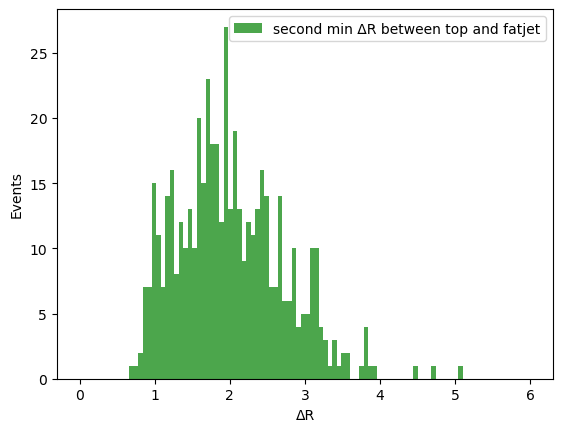

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_22.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

#deltar
dr_total = []
for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    # fatjet
    top_etas = top_eta[i][1]
    
    top_phi = top_phi1[i][1]
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)

    dr = np.sort(dr)  # Sort the ΔR 
    dr_total.append(dr)



# leading ΔR 값만 모아서 1-D 배열로
leading_drs   = np.array([dr[0] if len(dr) else np.nan for dr in dr_total]) # 가장 작은 ΔR 값
nextleading_drs = np.array([dr[1] if len(dr) > 1 else np.nan for dr in dr_total]) #두번째로 작은 ΔR 값
third_drs = np.array([dr[2] if len(dr) > 2 else np.nan for dr in dr_total]) #세번째로 작은 ΔR 값
print(nextleading_drs)
# leading 값을 제거하고 남은 ΔR 배열(길이가 사건마다 달라지므로 그대로 리스트 보존)
remaining_drs = [dr[1:] for dr in dr_total]# 가장 작은 ΔR 값을 제거한 나머지 ΔR 값들

#print(remaining_drs)
flatten_remaining_drs = ak.flatten(remaining_drs)
#plt.hist(leading_drs, bins=50, range=(0, 6), alpha=0.7, label='Highscore toptagger between top and fatjet',color = 'red')
plt.hist(nextleading_drs, bins=100, range=(0, 6), alpha=0.7, label='second Highscore toptagger between top and fatjet',color = 'green')
#plt.hist(third_drs, bins=50, range=(0, 6), alpha=0.7, label='third Highscore toptagger between top and fatjet',color = 'blue')
#plt.hist(flatten_remaining_drs, bins=50, range=(0, 6), alpha=0.3, label='ΔR between top and fatjet - Highscore toptagger removed', color = 'orange')
plt.xlabel('ΔR')
plt.ylabel('Events')
plt.legend()
##############################
#####################################







[[5, 5, 0, 0, 0], [5, 5, 0], [5, 5, 0], ..., [0, 5, 5, 5, 0], [5, 5, 0, 0]]
[[], [], [], [], [], [], [], [], [], ..., [], [], [], [], [], [], [], [], []]


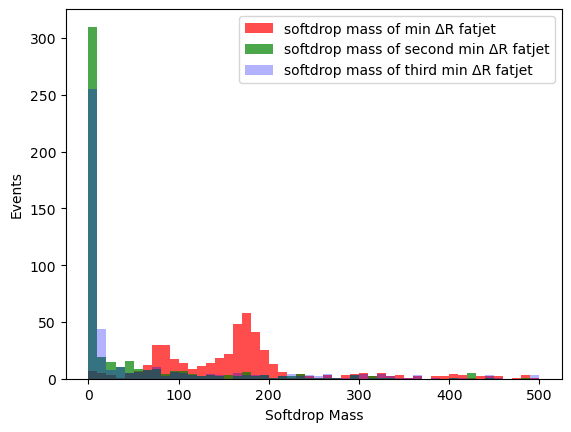

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

# softdrop mass
fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()


#deltar
dr_total = []

min_idx = []
second_min_idx = []
third_min_idx = []
min_drpmass = []
second_min_drpmass = []
third_min_drpmass = []

for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    # fatjet
    top_etas = top_eta[i][1]
    top_phi = top_phi1[i][1]
    
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)
    if len(dr) >1:
        ## dr 길이가 1보다 크면 두번째로 작은 ΔR 값의 인덱스 저장
        idx = np.argsort(dr)[0]
        min_idx.append(idx)
        drpmass = fatjet_softdrop_mass[i][idx]
        min_drpmass.append(drpmass)

        idx1 = np.argsort(dr)[1]
        second_min_idx.append(idx1)
        drpmass = fatjet_softdrop_mass[i][idx1]
        second_min_drpmass.append(drpmass)
    if len(dr) > 2:
        idx2 = np.argsort(dr)[2]
        third_min_idx.append(idx2)
        drpmass = fatjet_softdrop_mass[i][idx2]
        third_min_drpmass.append(drpmass)

    dr_total.append(dr)

plt.hist(min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of Highscore toptagger fatjet', color='red')
plt.hist(second_min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of second Highscore toptagger fatjet', color='green')
plt.hist(third_min_drpmass, bins=50, range=(0, 500), alpha=0.3, label='softdrop mass of third Highscore toptagger fatjet', color='blue')
plt.xlabel('Softdrop Mass')
plt.ylabel('Events')
plt.legend()
#plt.yscale('log')


hadron_flavour = events["FatJet_hadronFlavour"].array()
print(hadron_flavour)
tmask = ((hadron_flavour == 6))
hadron_flavour = hadron_flavour[tmask]
print(hadron_flavour)




# gen top 골랐을때 둘 중에서  첫번째거 두번째거 ( before FSR , after FSR)차이 비교 

[np.float32(0.01171875), np.float32(0.04296875), np.float32(0.0), np.float32(0.00048828125), np.float32(0.0), np.float32(0.5214844), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.00048828125), np.float32(0.27539062), np.float32(0.0078125), np.float32(0.11816406), np.float32(0.0), np.float32(0.046875), np.float32(0.0), np.float32(0.00390625), np.float32(0.0), np.float32(0.0078125), np.float32(0.00390625), np.float32(0.0009765625), np.float32(0.001953125), np.float32(0.53515625), np.float32(0.0), np.float32(0.08203125), np.float32(0.00024414062), np.float32(0.0390625), np.float32(0.0078125), np.float32(0.0), np.float32(0.0), np.float32(0.01953125), np.float32(0.0024414062), np.float32(0.095703125), np.float32(0.0009765625), np.float32(0.05078125), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0078125), np.float32(0.00390625), np.float32(0.0), np.float32(0.0), np.float32(0.00048828125), np.float32(0.009765625), np.float32(0.0), np.float

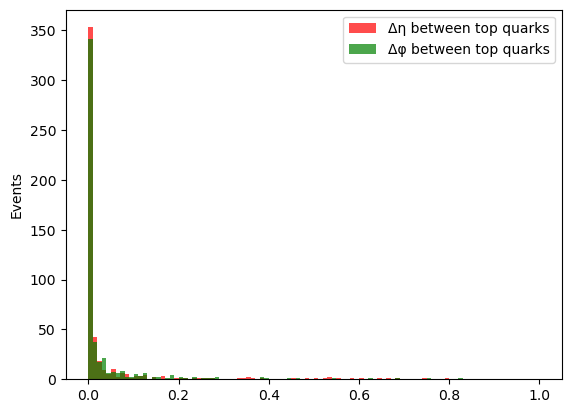

In [11]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()
gen_status = events["GenPart_statusFlags"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()


delta_etas = []
delta_phis = []
for i in range(len(fatjet_pt)):
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    top_etas0 = top_eta[i][0]
    top_phi0 = top_phi1[i][0]
    top_etas1 = top_eta[i][1]
    top_phis1 = top_phi1[i][1]
    
    delta_eta = abs(top_etas0 - top_etas1 )
    delta_phi = abs(top_phi0 - top_phis1)

    delta_etas.append(delta_eta)
    delta_phis.append(delta_phi)

print(delta_etas)
print(delta_phis)
plt.hist(delta_etas, bins=100, range=(0, 1), alpha=0.7, label='Δη between top quarks', color='red')
plt.hist(delta_phis, bins=100, range=(0, 1), alpha=0.7, label='Δφ between top quarks', color='green')
plt.ylabel('Events')
plt.legend()

for pid in gen_pdgid[2]:
    print(pid)



# --- flag 이름 테이블 (NanoAOD GenPart_statusFlags 순서) ---
flag_names = [
    "isPrompt",                          # bit 0
    "isDecayedLeptonHadron",             # 1
    "isTauDecayProduct",                 # 2
    "isPromptTauDecayProduct",           # 3
    "isDirectTauDecayProduct",           # 4
    "isDirectPromptTauDecayProduct",     # 5
    "isDirectHadronDecayProduct",        # 6
    "isHardProcess",                     # 7
    "fromHardProcess",                   # 8
    "isHardProcessTauDecayProduct",      # 9
    "isDirectHardProcessTauDecayProduct",# 10
    "fromHardProcessBeforeFSR",          # 11
    "isFirstCopy",                       # 12
    "isLastCopy",                        # 13
    "isLastCopyBeforeFSR"                # 14
]

def decode(flags):
    """return list of flag names that are set in `flags`"""
    return [name for i, name in enumerate(flag_names) if flags & (1 << i)]

print("4481  →", decode(4481))
print("10497 →", decode(10497))


print(gen_status[2][16])
print(gen_status[2][18])
print(gen_pdgid[2][16])


##  가까운것들 top tagger 점수

499
72


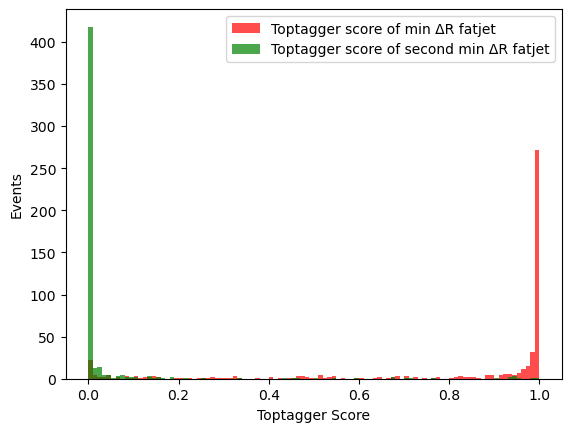

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak


sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()

# softdrop mass
fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()

#toptagger 
toptagger = events["FatJet_particleNetWithMass_TvsQCD"].array()

#deltar
dr_total = []

min_idx = []
second_min_idx = []
third_min_idx = []
min_drpmass = []
second_min_drpmass = []
third_min_drpmass = []
min_tagger_score = []
second_min_tagger_score = []
third_min_tagger_score = []
for i in range(len(fatjet_pt)):
    if len(fatjet_pt[i]) == 0:
        continue
    if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
        continue
    # fatjet
    top_etas = top_eta[i][1]
    top_phi = top_phi1[i][1]
    
    delta_eta = fatjet_eta[i] - top_etas
    
    delta_phi = fatjet_phi[i] -top_phi 
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)
    if len(dr) >1:
        ## dr 길이가 1보다 크면 두번째로 작은 ΔR 값의 인덱스 저장
        idx = np.argsort(dr)[0]
        min_idx.append(idx)
        drpmass = fatjet_softdrop_mass[i][idx]
        min_drpmass.append(drpmass)
        tagger1 = toptagger[i][idx]
        min_tagger_score.append(tagger1)

        idx1 = np.argsort(dr)[1]
        second_min_idx.append(idx1)
        drpmass = fatjet_softdrop_mass[i][idx1]
        second_min_drpmass.append(drpmass)
        tagger2 = toptagger[i][idx1]
        second_min_tagger_score.append(tagger2)
    if len(dr) > 2:
        idx2 = np.argsort(dr)[2]
        third_min_idx.append(idx2)
        drpmass = fatjet_softdrop_mass[i][idx2]
        third_min_drpmass.append(drpmass)
        tagger3 = toptagger[i][idx2]
        third_min_tagger_score.append(tagger3)

    dr_total.append(dr)

plt.hist(min_tagger_score, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of Highscore toptagger fatjet', color='red')
plt.hist(second_min_tagger_score, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of second Highscore toptagger fatjet', color='green')
#plt.hist(third_min_tagger_score, bins=50, range=(0, 1), alpha=0.3, label='Toptagger score of third Highscore toptagger fatjet', color='blue')
plt.xlabel('Toptagger Score')
plt.ylabel('Events')
plt.legend()


print(len(min_tagger_score))
# 리스트를 numpy array로 변환
min_tagger_score_arr = np.array(min_tagger_score)
tagger_less_than_08_mask = (min_tagger_score_arr < 0.4)
filtered_min_tagger_score = min_tagger_score_arr[tagger_less_than_08_mask]
print(len(filtered_min_tagger_score))


### signal top index 이용해서 top cut 적용시 우리가 원하는 top을 분간 해낼 수 있는지 확인 . 

[47, 59, 110, 119, 133, 180, 217, 278, 393]
# for fake signal 1.8 %
# for no signal 31.6 %
# for one signal 66.6 %
softdropmass: [[528, 193, 0.112], [162, 0.114, 330], ..., [196, ...], [300, 0.111, 100, 75.5]]
toptagger : [[0.999, 0.963, 8.31e-08], [0.934, ...], ..., [0.998, 1.81e-09, 0.957, 0.13]]
more than 3 ak8 in event num 0
jet flavor for fake event: [[5, 5], [5, 5], [5, 5], [5, 5], [5, 5], [5, 5], [5, 5], [5, 5], [5, 5]]
[0.0912, 2.81, 2.11]
top_dr_mask1: 2
top_dr1: 0.0912446
[2.13, 2.37, 0.179]
top_dr_mask1: 1
top_dr1: 0.17852849
[2.16, 0.0132, 2.39]
top_dr_mask1: 0
top_dr1: 0.013192633
[0.0109, 3.37, 2.53, 2.5]
top_dr_mask1: 2
top_dr1: 0.01093194
[0.018, 2.9, 2.89, 2.36]
top_dr_mask1: 2
top_dr1: 0.017960625
[0.0479, 3.11, 2.17]
top_dr_mask1: 2
top_dr1: 0.04788269
[0.0803, 2.55, 2.29, 1.68]
top_dr_mask1: 3
top_dr1: 0.0803231
[0.0358, 2.84, 1.8, 2.9]
top_dr_mask1: 2
top_dr1: 0.035829872
[0.0714, 2.66, 3.72, 1.43]
top_dr_mask1: 1
top_dr1: 0.07138484
----


'\ntop_etas = top_eta[k][1]\ntop_phi = top_phi1[k][1]\n    \ndelta_eta = fatjet_eta[k] - top_etas\n    \ndelta_phi = fatjet_phi[k] -top_phi \ndelta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]\n#ΔR 계산\ndr = np.sqrt(delta_eta**2 + delta_phi**2)\nprint("deltar:",dr)\nif len(dr) >1:\n    ## dr 길이가 1보다 크면 두번째로 작은 ΔR 값의 인덱스 저장\n    idx = np.argsort(dr)[0]\nprint("real top idx:",idx)\n'

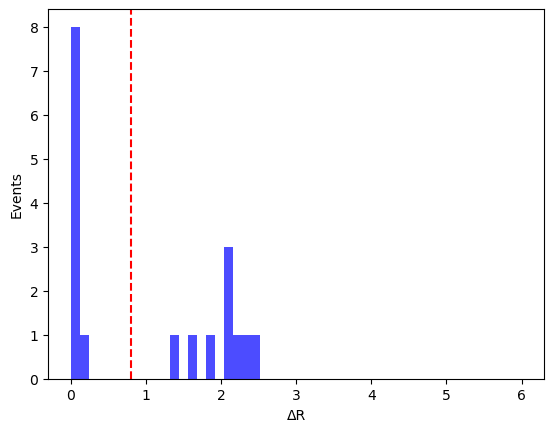

In [181]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm  # ✅ 진행률 표시

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_40.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_eta = gen_eta[topmask]
top_phi1 = gen_phi[topmask]

## Fatjet 
fatjet_pt = events["FatJet_pt"].array()
fatjet_eta = events["FatJet_eta"].array()
fatjet_phi = events["FatJet_phi"].array()
fatjet_flavor = events["FatJet_hadronFlavour"].array()
fatjet_mass = events["FatJet_mass"].array()
# softdrop mass
fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()

#toptagger 
toptagger = events["FatJet_particleNetWithMass_TvsQCD"].array()

## singnal finder mask
top_FatJet_mask =((toptagger > 0.9) & ( fatjet_softdrop_mass > 80 ) )#& (fatjet_softdrop_mass < 250) ) ## fatjet 중에서 마스크

has_two_or_more = ak.sum(top_FatJet_mask, axis=1) >= 2
has_no_signal = ak.sum(top_FatJet_mask, axis=1) == 0
has_one_signal = ak.sum(top_FatJet_mask, axis=1) == 1
fake_event_idx = np.where(has_two_or_more)[0] ## 두개 이상의 fat jet이 있는 이벤트의 인덱스
print(ak.to_list(fake_event_idx))
print("# for fake signal",ak.sum(has_two_or_more)/5,"%")
print("# for no signal",ak.sum(has_no_signal)/5,"%")
print("# for one signal",ak.sum(has_one_signal)/5,"%")



k=fake_event_idx
print("softdropmass:",fatjet_softdrop_mass[k])
print("toptagger :",toptagger[k])
toptagger_mask_with_morethan_2 = toptagger>0.9
toptagger_mask_with_morethan_2s = toptagger[toptagger_mask_with_morethan_2]
lens = ak.num(toptagger_mask_with_morethan_2s)
lens_mask = lens > 3
print("more than 3 ak8 in event num", len(lens[lens_mask]))
#print("toptagger with more than 2:",ak.to_list(toptagger_mask_with_morethan_2s))
#print("jet flavor:" ,ak.to_list(fatjet_flavor[k]))
fatjet_flavor = fatjet_flavor[top_FatJet_mask] # 컷을 통과한 fat jet의 flavor
print("jet flavor for fake event:",ak.to_list(fatjet_flavor[k])) ##  fat jet의 flavor 전부 b jet 때문인지 확인 ( 실제 와 fake 섞인 flavor)

#print("k:",k)
# 가장 큰 toptagger의 진짜와 deltaR 차이
dr1 = []
dr2 = []
for i in range(len(k)):
    idxs = k[i]
    
    top_etas = top_eta[idxs][1]
    top_phi = top_phi1[idxs][1]
    tag = toptagger[idxs]
    
    delta_phi = fatjet_phi[idxs] -top_phi 
    
    delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
    delta_eta = fatjet_eta[idxs] - top_etas
    #ΔR 계산
    dr = np.sqrt(delta_eta**2 + delta_phi**2)
    if len(dr) >1:
        idx1 = np.argsort(dr)[0]
        idx2 = np.argsort(dr)[1]
    top_dr_mask1 = np.argsort(tag)[0] # 가장 큰 toptagger의 인덱스
    #top_dr_mask2 = np.argsort(tag)[1] # 두번째로 큰 toptagger의 인덱스
    print(dr)
    print("top_dr_mask1:",top_dr_mask1)

    top_dr1 = dr[idx1]
    top_dr2 = dr[idx2]
    print("top_dr1:",top_dr1)
    #top_dr2 = dr[top_dr_mask2]
    #print("top_dr1:",top_dr1,"top_dr2:",top_dr2)
    dr1.append(top_dr1)
    dr1.append(top_dr2)

plt.hist(dr1, bins=50, range=(0, 6), alpha=0.7, label='ΔR between top and fatjet', color='blue')
plt.axvline(x=0.8, color='red', linestyle='--', label='ΔR = 0.8')
plt.xlabel('ΔR')
plt.ylabel('Events')
print("----")
#fatjet_flavor = events["FatJet_hadronFlavour"].array()
#print("jet flavor:" ,ak.to_list(fatjet_flavor[59]))
#print("softdropmass:",fatjet_softdrop_mass[59])
#print("toptagger :",toptagger[59])
'''
top_etas = top_eta[k][1]
top_phi = top_phi1[k][1]
    
delta_eta = fatjet_eta[k] - top_etas
    
delta_phi = fatjet_phi[k] -top_phi 
delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
#ΔR 계산
dr = np.sqrt(delta_eta**2 + delta_phi**2)
print("deltar:",dr)
if len(dr) >1:
    ## dr 길이가 1보다 크면 두번째로 작은 ΔR 값의 인덱스 저장
    idx = np.argsort(dr)[0]
print("real top idx:",idx)
'''

### 모든 파일에 대해서 fake dr 찾기 (1 ak8 passed)

In [3]:
## 
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
path = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/"
file_list = sorted(glob.glob(path + "*.root"))

dr_fake_1_1p = []  # 두개 이상의 fat jet이 있는 이벤트의 첫번째 ΔR 값 , 1개 통과한 경우 
dr_fake_2_1p = []  # 두개 이상의 fat jet이 있는 이벤트의 두번째 ΔR 값
topscore_1_1p = []  # 두개 이상의 fat jet이 있는 이벤트의 첫번째 toptagger score ,( 일단 signal이 제대로 통과했는지 확인)
topscore_2_1p = []  # 두개 이상의 fat jet이 있는 이벤트의 두번째 toptagger score
softdropmass_1_1p = []  # 두개 이상의 fat jet이 있는 이벤트의 첫번째 softdrop mass( 일단 signal이 제대로 통과했는지 확인)
softdropmass_2_1p = []  # 두개 이상의 fat jet이 있는 이벤트의 두번째 softdrop mass


has_two_or_mores_1p = 0
has_two_or_mores_2p = 0
has_no_signals_1p = 0
has_no_signals_2p = 0
has_one_signals_1p = 0
has_one_signals_2p = 0
more_than_3s = 0
for sample in tqdm(file_list, desc="Processing ROOT files"):
    file = uproot.open(sample)
    events = file["Events"]
    keys = events.keys()

    def delta_phi(phi1, phi2):
        d = phi1 - phi2
        # wrap to [-π, +π]
        return (d + np.pi) % (2*np.pi) - np.pi

    def delta_r(deta, dphi):
        return np.sqrt(d_eta**2 + d_phi**2)


    ## gen part 관련 정보
    gen_pdgid = events["GenPart_pdgId"].array()
    gen_pt = events["GenPart_pt"].array()
    gen_eta = events["GenPart_eta"].array()
    gen_phi = events["GenPart_phi"].array()

    topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
    top_eta = gen_eta[topmask]
    top_phi1 = gen_phi[topmask]

    ## Fatjet 
    fatjet_pt = events["FatJet_pt"].array()
    fatjet_eta = events["FatJet_eta"].array()
    fatjet_phi = events["FatJet_phi"].array()
    fatjet_flavor = events["FatJet_hadronFlavour"].array()
    fatjet_mass = events["FatJet_mass"].array()
    # softdrop mass
    fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()

    #toptagger 
    toptagger = events["FatJet_particleNetWithMass_TvsQCD"].array()

    ## singnal finder mask
    top_FatJet_mask =((toptagger > 0.9) & ( fatjet_softdrop_mass > 80 ) )#& (fatjet_softdrop_mass < 250) ## fatjet 중에서 마스크
    has_two_or_more = ak.sum(top_FatJet_mask, axis=1) >= 2
    has_no_signal = ak.sum(top_FatJet_mask, axis=1) == 0
    has_one_signal = ak.sum(top_FatJet_mask, axis=1) == 1
    

    #1p
    fake_event_idx_1p = np.where(has_one_signal)[0] ## 한개 fat jet 통과 이벤트의 인덱스
    #2p


    ### sig , fake , no signal 비율
    has_two_or_mores_1p += ak.sum(has_two_or_more)
    has_no_signals_1p += ak.sum(has_no_signal)
    has_one_signals_1p += ak.sum(has_one_signal)
    

    ### 3개 이상의 fat jet이 통과한 이벤트 수 
    k_1p=fake_event_idx_1p


    ## fake event 의 dr 저장 
    dr1_1p = []
    dr2_1p = []
    dr1_topscore_1p = []
    dr2_topscore_1p = []
    dr1_softdropmass_1p = []
    dr2_softdropmass_1p = []

    ## 1개의 ak8 이 통과한 경우
    

    for i in range(len(k_1p)):
        if len(k_1p) == 0:
            continue  # 현재 이벤트에 통과한 fat jet이 없는 경우 건너뛰기
        idxs = k_1p[i]
        top_etas = top_eta[idxs][0]
        top_phi = top_phi1[idxs][0]
        tag = toptagger[idxs]

        delta_phi = fatjet_phi[idxs] -top_phi     
        delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
        delta_eta = fatjet_eta[idxs] - top_etas
        #ΔR 계산
        dr = np.sqrt(delta_eta**2 + delta_phi**2)
        if len(dr) >1:
            #idx1 = np.argsort(dr)[0]
            #idx2 = np.argsort(dr)[1]
            top_dr_mask1 = np.argsort(tag)[-1] # 가장 큰 toptagger의 인덱스
            top_dr_mask2 = np.argsort(tag)[-2] # 두번째로 큰 toptagger의 인덱스

            top_dr1 = dr[top_dr_mask1] 
            top_dr2 = dr[top_dr_mask2]
            top_tagger1 = tag[top_dr_mask1]
            top_tagger2 = tag[top_dr_mask2]
            top_softdropmass1 = fatjet_softdrop_mass[idxs][top_dr_mask1]
            top_softdropmass2 = fatjet_softdrop_mass[idxs][top_dr_mask2]
            dr1_1p.append(top_dr1)
            dr2_1p.append(top_dr2)
            dr1_topscore_1p.append(top_tagger1)
            dr2_topscore_1p.append(top_tagger2)
            dr1_softdropmass_1p.append(top_softdropmass1)
            dr2_softdropmass_1p.append(top_softdropmass2)
    dr_fake_1_1p.extend(dr1_1p)  # 모든 파일의 dr1 값을 하나의 리스트에 추가
    dr_fake_2_1p.extend(dr2_1p)  # 모든 파일의 dr2 값을 하나의 리스트에 추가
    topscore_1_1p.extend(dr1_topscore_1p)
    topscore_2_1p.extend(dr2_topscore_1p)
    softdropmass_1_1p.extend(dr1_softdropmass_1p)
    softdropmass_2_1p.extend(dr2_softdropmass_1p)
    





Processing ROOT files: 100%|██████████| 114/114 [07:12<00:00,  3.80s/it]


0.13384986


## 2 AK8 passed

In [ ]:
## 
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

import glob
from tqdm import tqdm
path = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/"
file_list = sorted(glob.glob(path + "*.root"))

dr_fake_1_2p = []  # 두개 이상의 fat jet이 있는 이벤트의 첫번째 ΔR 값 , 2개 통과한 경우
dr_fake_2_2p = []  # 두개 이상의 fat jet이 있는 이벤트의 두번째 ΔR 값
topscore_1_2p = []  # 두개 이상의 fat jet이 있는 이벤트의 첫번째 toptagger score ,( 일단 signal이 제대로 통과했는지 확인)
topscore_2_2p = []  # 두개 이상의 fat jet이 있는 이벤트
softdropmass_1_2p = []  # 두개 이상의 fat jet이 있는 이벤트의 첫번째 softdrop mass( 일단 signal이 제대로 통과했는지 확인)
softdropmass_2_2p = []  # 두개 이상의 fat jet이 있는 이벤트의 두번째 softdrop mass

has_two_or_mores_1p = 0
has_two_or_mores_2p = 0
has_no_signals_1p = 0
has_no_signals_2p = 0
has_one_signals_1p = 0
has_one_signals_2p = 0
more_than_3s = 0
for sample in tqdm(file_list, desc="Processing ROOT files"):
    file = uproot.open(sample)
    events = file["Events"]
    keys = events.keys()

    def delta_phi(phi1, phi2):
        d = phi1 - phi2
        # wrap to [-π, +π]
        return (d + np.pi) % (2*np.pi) - np.pi

    def delta_r(deta, dphi):
        return np.sqrt(d_eta**2 + d_phi**2)


    ## gen part 관련 정보
    gen_pdgid = events["GenPart_pdgId"].array()
    gen_pt = events["GenPart_pt"].array()
    gen_eta = events["GenPart_eta"].array()
    gen_phi = events["GenPart_phi"].array()

    topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
    top_eta = gen_eta[topmask]
    top_phi1 = gen_phi[topmask]

    ## Fatjet 
    fatjet_pt = events["FatJet_pt"].array()
    fatjet_eta = events["FatJet_eta"].array()
    fatjet_phi = events["FatJet_phi"].array()
    fatjet_flavor = events["FatJet_hadronFlavour"].array()
    fatjet_mass = events["FatJet_mass"].array()
    # softdrop mass
    fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()

    #toptagger 
    toptagger = events["FatJet_particleNetWithMass_TvsQCD"].array()

    ## singnal finder mask
    top_FatJet_mask =((toptagger > 0.9) & ( fatjet_softdrop_mass > 120 ) )#& (fatjet_softdrop_mass < 250) ## fatjet 중에서 마스크
    has_two_or_more = ak.sum(top_FatJet_mask, axis=1) >= 2
    has_no_signal = ak.sum(top_FatJet_mask, axis=1) == 0
    has_one_signal = ak.sum(top_FatJet_mask, axis=1) == 1
    
    #2p
    fake_event_idx_2p = np.where(has_two_or_more)[0] ## 두개의 fat jet이 통과 이벤트의 인덱스

    ### sig , fake , no signal 비율
    has_two_or_mores_2p += ak.sum(has_two_or_more)
    has_no_signals_2p += ak.sum(has_no_signal)
    has_one_signals_2p += ak.sum(has_one_signal)
    

    ### 3개 이상의 fat jet이 통과한 이벤트 수 
    #k_1p=fake_event_idx_1p
    k_2p=fake_event_idx_2p

    ## fake event 의 dr 저장 
    dr1_2p = []
    dr2_2p = []
    dr1_topscore_2p = []
    dr2_topscore_2p = []
    dr1_softdropmass_2p = []
    dr2_softdropmass_2p = []


    ## 2개의 ak8 이 통과한 경우 
    if len(k_2p) != 0:
        for i in range(len(k_2p)):
            idxs = k_2p[i]
            top_etas = top_eta[idxs][1]
            top_phi = top_phi1[idxs][1]
            tag = toptagger[idxs]

            delta_phi = fatjet_phi[idxs] -top_phi 
            delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
            delta_eta = fatjet_eta[idxs] - top_etas
            #ΔR 계산
            dr = np.sqrt(delta_eta**2 + delta_phi**2)
            if len(dr) >1:
                #idx1 = np.argsort(dr)[0]
                #idx2 = np.argsort(dr)[1]
                top_dr_mask1 = np.argsort(tag)[-1] # 가장 큰 toptagger의 인덱스
                top_dr_mask2 = np.argsort(tag)[-2] # 두번째로 큰 toptagger의 인덱스
                top_dr1 = dr[top_dr_mask1]
                top_dr2 = dr[top_dr_mask2]
                top_tagger1 = tag[top_dr_mask1]
                top_tagger2 = tag[top_dr_mask2]
                top_softdropmass1 = fatjet_softdrop_mass[idxs][top_dr_mask1]
                top_softdropmass2 = fatjet_softdrop_mass[idxs][top_dr_mask2]
                dr1_2p.append(top_dr1)
                dr2_2p.append(top_dr2)
                dr1_topscore_2p.append(top_tagger1)
                dr2_topscore_2p.append(top_tagger2)
                dr1_softdropmass_2p.append(top_softdropmass1)
                dr2_softdropmass_2p.append(top_softdropmass2)

        dr_fake_1_2p.extend(dr1_2p)  # 모든 파일의 dr1 값을 하나의 리스트에 추가
        dr_fake_2_2p.extend(dr2_2p)  # 모든 파일의 dr2 값을 하나의 리스트에 추가
        topscore_1_2p.extend(dr1_topscore_2p)
        topscore_2_2p.extend(dr2_topscore_2p)
        softdropmass_1_2p.extend(dr1_softdropmass_2p)
        softdropmass_2_2p.extend(dr2_softdropmass_2p)





Processing ROOT files: 100%|██████████| 80/80 [01:36<00:00,  1.20s/it]


Text(0.5, 0, 'Softdrop Mass')

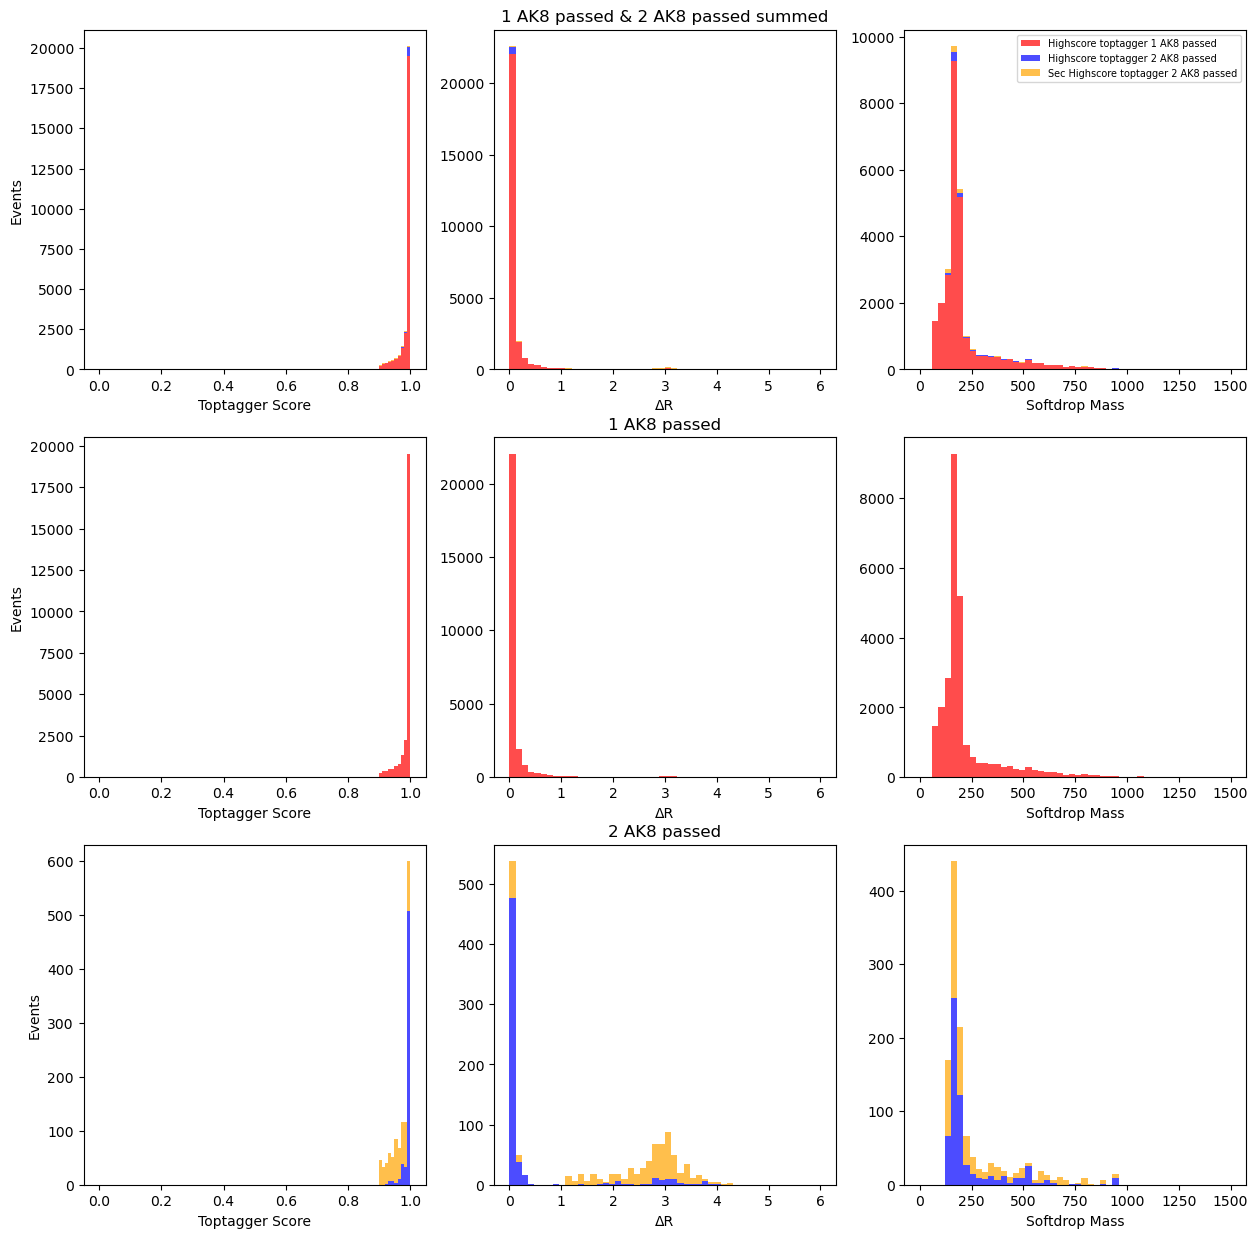

In [5]:
#print("Total number of events with no signals:", has_no_signals)
#print("Total number of events with one signal:", has_one_signals)
#print("Total number of events with two or more signals:", has_two_or_mores)
#print("Total number of events with more than 3 signals:", more_than_3s)
ax , axs = plt.subplots(3, 3, figsize=(15, 15))
axs[0,0].hist(
    [topscore_1_1p, topscore_1_2p, topscore_2_2p],
    bins=100,
    range=(0, 1),
    stacked=True,
    label=[
        'Toptagger score of Highscore toptagger 1 AK8 passed',
        'Toptagger score of Highscore toptagger 2 AK8 passed',
        
        'Toptagger score of sec Highscore toptagger 2 AK8 passed'
    ],
    color=['red', 'blue', 'orange'],
    alpha=0.7
)

axs[0,0].set_xlabel('Toptagger Score')
axs[0,0].set_ylabel('Events')       

# Stacked histogram for ΔR distributions (1 AK8 passed vs 2 AK8 passed)
axs[0,1].hist(
    [dr_fake_1_1p, dr_fake_1_2p, dr_fake_2_2p],
    bins=50,
    range=(0, 6),
    stacked=True,
    label=[
        'Highscore toptagger 1 AK8 passed',
        'Highscore toptagger 2 AK8 passed',
        
        'sec Highscore toptagger 2 AK8 passed'
    ],
    color=['red', 'blue', 'orange'],
    alpha=0.7
)
#axs[0,1].legend()
axs[0,1].set_title('1 AK8 passed & 2 AK8 passed summed')
axs[0,1].set_xlabel('ΔR')
#axs[6,0].set_yscale('log')

axs[0,2].hist(
    [softdropmass_1_1p,softdropmass_1_2p, softdropmass_2_2p],
    bins=50,
    range=(0, 1500),
    stacked=True,
    label=[
        'Highscore toptagger 1 AK8 passed',
        'Highscore toptagger 2 AK8 passed',
        'Sec Highscore toptagger 2 AK8 passed'
    ],
    color=['red', 'blue', 'orange'],
    alpha=0.7
)
axs[0,2].legend(fontsize=7)
axs[0,2].set_xlabel('Softdrop Mass')
#axs[0,2].set_yscale('log')
#axs[6,1].set_yscale('log') 

axs[1,0].hist(
    [topscore_1_1p],
    bins=100,
    range=(0, 1),
    stacked=True,
    label=[
        'Toptagger score of Highscore toptagger 1 AK8 passed'
        
    ],
    color=['red'],
    alpha=0.7
)
axs[1,0].set_xlabel('Toptagger Score')
axs[1,0].set_ylabel('Events')

axs[1,1].hist(
    [dr_fake_1_1p],
    bins=50,
    range=(0, 6),
    stacked=True,
    label=[
        'Highscore toptagger 1 AK8 passed'
    ],
    color=['red'],
    alpha=0.7
)
axs[1,1].set_xlabel('ΔR')
#axs[1,1].legend()
axs[1,1].set_title('1 AK8 passed')
#axs[7,0].set_yscale('log')

axs[1,2].hist(
    [softdropmass_1_1p],
    bins=50,
    range=(0, 1500),
    stacked=True,
    label=[
        'Softdrop mass of Highscore toptagger 1 AK8 passed'
        
    ],
    color=['red'],
    alpha=0.7
)
#axs[1,2].legend()
axs[1,2].set_xlabel('Softdrop Mass')
#axs[1,2].set_yscale('log')
#axs1[7,1].set_yscale('log')

axs[2,0].hist(
    [topscore_1_2p, topscore_2_2p],
    bins=100,
    range=(0, 1),
    stacked=True,
    label=[
        'Toptagger score of Highscore toptagger 2 AK8 passed',
        'Toptagger score of sec Highscore toptagger 2 AK8 passed'
    ],
    color=['blue', 'orange'],
    alpha=0.7
)

axs[2,0].set_xlabel('Toptagger Score')
axs[2,0].set_ylabel('Events')   

axs[2,1].hist(
    [dr_fake_1_2p, dr_fake_2_2p],
    bins=50,
    range=(0, 6),
    stacked=True,
    label=[
        'Highscore toptagger 2 AK8 passed',
        'sec Highscore toptagger 2 AK8 passed'
    ],
    color=['blue', 'orange'],
    alpha=0.7
)
#axs[2,1].legend()
axs[2,1].set_xlabel('ΔR')
axs[2,1].set_title('2 AK8 passed')
#axs[8,0].set_yscale('log')     
axs[2,2].hist(
    [softdropmass_1_2p, softdropmass_2_2p],
    bins=50,
    range=(0, 1500),
    stacked=True,
    label=[
        'Softdrop mass of Highscore toptagger 2 AK8 passed',
        'Softdrop mass of sec Highscore toptagger 2 AK8 passed'
    ],
    color=['blue', 'orange'],
    alpha=0.7
)
#axs[2,2].legend()
#axs[2,2].set_yscale('log')
axs[2,2].set_xlabel('Softdrop Mass')
#axs[8,1].set_yscale('log') 
    
    
    


### 적당한 컷 찾기 

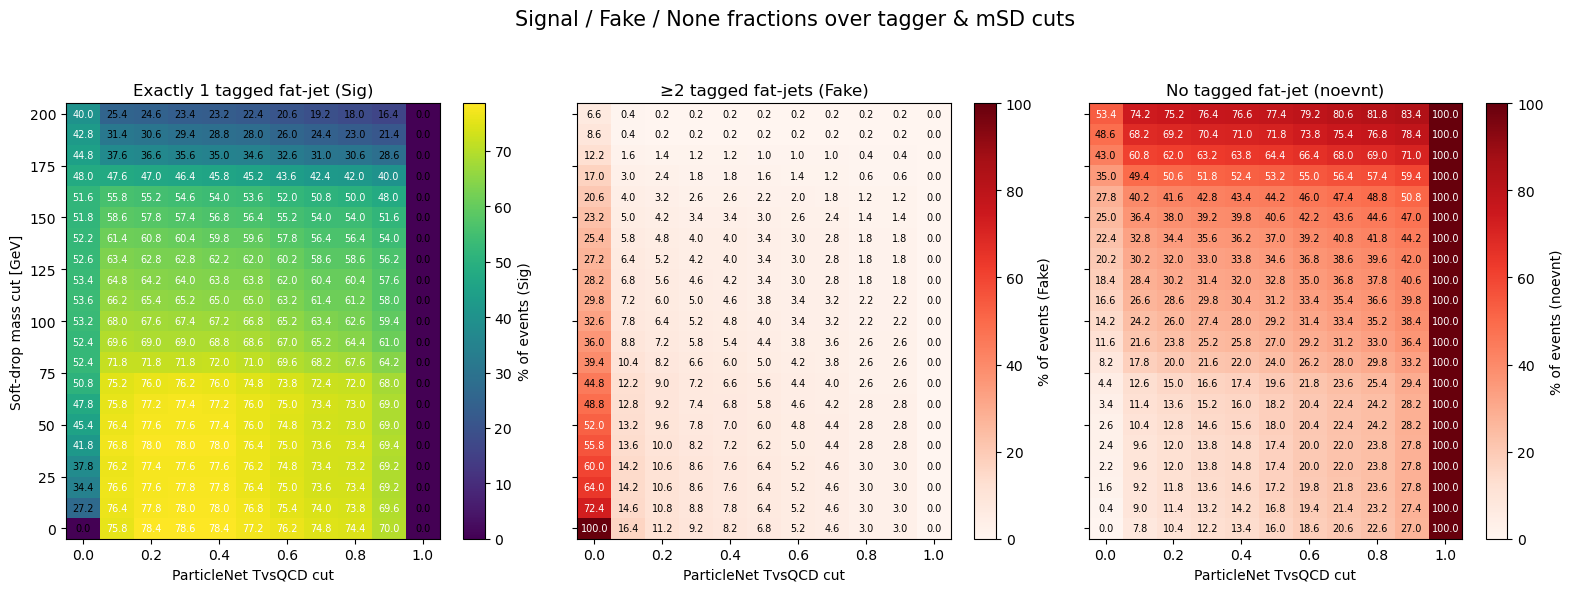

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Grid-scan over (particleNet TvsQCD cut, msoftdrop cut)
and record event-fractions into CSV.
"""

import uproot
import awkward as ak
import numpy as np
import pandas as pd      # only for the final CSV
from pathlib import Path
import matplotlib.pyplot as plt

# ----------------------------------------------------------------------
# ① Load NanoAOD once
sample = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV_1.root"
with uproot.open(sample) as file:
    events = file["Events"]
    n_evt   = events.num_entries

    fatjet_tagger    = events["FatJet_particleNetWithMass_TvsQCD"].array()
    fatjet_msdcorr   = events["FatJet_msoftdrop"].array()




# ----------------------------------------------------------------------
# ② Prepare scan grids
tagger_cuts   = np.linspace(0.0, 1.0, 11, endpoint=True)      # 0.1 … 1.0  (10 pts)
msd_cuts      = np.arange(0, 201, 10)                         # 0 … 200    (21 pts)

rows = []   # collect dictionaries → DataFrame

# ----------------------------------------------------------------------
# ③ Double-loop over grid
for t_cut in tagger_cuts:
    tagger_mask = fatjet_tagger > t_cut        # shape: (evt, n_fatjet)

    for msd_cut in msd_cuts:
        fatjet_mask = tagger_mask & (fatjet_msdcorr > msd_cut)

        n_pass  = ak.sum(fatjet_mask, axis=1)            # per-event multiplicity
        cnt_2p  = int(ak.sum(n_pass >= 2))
        cnt_1   = int(ak.sum(n_pass == 1))
        cnt_0   = int(ak.sum(n_pass == 0))

        # store percentages (≡ cnt / 5 in 기존 코드 → 총 5 × ? 의미였음)
        rows.append({
            "tagger_cut":  round(t_cut, 2),
            "msd_cut":     msd_cut,
            "n_evt_total": n_evt,
            "Fake": cnt_2p / n_evt * 100.0,
            "Sig":        cnt_1  / n_evt * 100.0,
            "noevnt":       cnt_0  / n_evt * 100.0,
            "raw_two_or_more": cnt_2p,   # raw counts도 같이 남김
            "sig-fake" : (cnt_1 - cnt_2p)/n_evt *100  # signal - fake
        })

# ----------------------------------------------------------------------
# ④ Save → CSV
df = pd.DataFrame(rows)
csv_path = Path("out_scan.csv")
df.to_csv(csv_path, index=False)
# ------------------------------------------------------------------
# ④-A  Pivot 두 개 만들기
pivot_sig  = df.pivot(index="msd_cut", columns="tagger_cut", values="Sig") \
               .sort_index().sort_index(axis=1)
pivot_fake = df.pivot(index="msd_cut", columns="tagger_cut", values="Fake") \
               .sort_index().sort_index(axis=1)
pivot_noevnt = df.pivot(index="msd_cut", columns="tagger_cut", values="noevnt") \
               .sort_index().sort_index(axis=1)
# 공통 좌표축
x_edges = pivot_sig.columns.to_numpy()   # 10
y_edges = pivot_sig.index.to_numpy()     # 21
dx = np.diff(x_edges).mean() / 2.0
dy = np.diff(y_edges).mean() / 2.0
extent = [x_edges[0]-dx, x_edges[-1]+dx, y_edges[0]-dy, y_edges[-1]+dy]

# ------------------------------------------------------------------
# ------------------------------------------------------------------
# ④-B  Side-by-side plots + cell numbers
fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

plots = [
    (axes[0], pivot_sig.to_numpy(),   "Exactly 1 tagged fat-jet (Sig)",
     "% of events (Sig)",   "viridis"),
    (axes[1], pivot_fake.to_numpy(),  "≥2 tagged fat-jets (Fake)",
     "% of events (Fake)",  "Reds"),
    (axes[2], pivot_noevnt.to_numpy(),"No tagged fat-jet (noevnt)",
     "% of events (noevnt)", "Reds"),
]

for ax, z, title, cbar_label, cmap in plots:
    im = ax.imshow(
        z, origin="lower", aspect="auto",
        extent=extent, cmap=cmap
    )
    fig.colorbar(im, ax=ax).set_label(cbar_label)
    ax.set_title(title)
    ax.set_xlabel("ParticleNet TvsQCD cut")

    # --- 셀마다 숫자 쓰기 -----------------------------------------
    # colormap의 가운데보다 밝으면 글자 검정, 어두우면 흰색
    thr = (im.norm.vmin + im.norm.vmax) * 0.5
    for iy, m_cut in enumerate(y_edges):
        for ix, t_cut in enumerate(x_edges):
            val = z[iy, ix]
            ax.text(
                t_cut, m_cut,
                f"{val:.1f}",              # 소수 1자리
                ha="center", va="center",
                fontsize=7,
                color="white" if val > thr else "black"
            )

axes[0].set_ylabel("Soft-drop mass cut [GeV]")
fig.suptitle("Signal / Fake / None fractions over tagger & mSD cuts", fontsize=15)
fig.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

## for all file

In [3]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm  # ✅ 진행률 표시

vector.register_awkward()

# 모든 .root 파일 경로 가져오기
path = "/data6/Users/achihwan/LRSM_tb_channel/SAMPLEPRODUCTION/samples/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/"
file_list = sorted(glob.glob(path + "*.root"))

# 누적 리스트
def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)

dr_total_all = []

min_idx_all = []
second_min_idx_all = []
third_min_idx_all = []

min_drpmass_all = []
second_min_drpmass_all = []
third_min_drpmass_all = []

min_tagger_score_all = []
second_min_tagger_score_all = []
third_min_tagger_score_all = []

tau2_list_all = []
tau3_list_all = []

# tqdm으로 파일 리스트 순회
for sample in tqdm(file_list, desc="Processing ROOT files"):
    file = uproot.open(sample)
    events = file["Events"]




    ## gen part 관련 정보
    gen_pdgid = events["GenPart_pdgId"].array()
    gen_pt = events["GenPart_pt"].array()
    gen_eta = events["GenPart_eta"].array()
    gen_phi = events["GenPart_phi"].array()

    topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
    top_eta = gen_eta[topmask]
    top_phi1 = gen_phi[topmask]

    ## Fatjet 
    fatjet_pt = events["FatJet_pt"].array()
    fatjet_eta = events["FatJet_eta"].array()
    fatjet_phi = events["FatJet_phi"].array()

    # softdrop mass
    fatjet_softdrop_mass = events["FatJet_msoftdrop"].array()

    # toptagger
    toptagger = events["FatJet_particleNetWithMass_TvsQCD"].array()
    
    tau2 = events["FatJet_tau2"].array()
    tau3 = events["FatJet_tau3"].array()

    #deltar
    dr_total = []

    min_idx = []
    second_min_idx = []
    third_min_idx = []
    min_drpmass = []
    second_min_drpmass = []
    third_min_drpmass = []
    
    min_tagger_score = []
    second_min_tagger_score = []
    third_min_tagger_score = []

    tau2_list = []
    tau3_list = []

    for i in range(len(fatjet_pt)):
        if len(fatjet_pt[i]) == 0:
            continue
        if len(top_eta[i])  < 2:  # top_eta[i]가 비어있거나 길이가 1보다 작은 경우 건너뛰기
            continue
        # fatjet
        top_etas = top_eta[i][1]
        top_phi = top_phi1[i][1]
    
        delta_eta = fatjet_eta[i] - top_etas
    
        delta_phi = fatjet_phi[i] -top_phi 
        delta_phi = (delta_phi + np.pi) % (2 * np.pi) - np.pi  # wrap to [-π, +π]
        #ΔR 계산
        dr = np.sqrt(delta_eta**2 + delta_phi**2)
        if len(dr) >1:
            # dr 길이가 1보다 크면 가장 작은 ΔR 값의 인덱스 저장
            idx = np.argsort(dr)[0]
            min_idx.append(idx)
            drpmass = fatjet_softdrop_mass[i][idx]
            min_drpmass.append(drpmass)
            tagger1 = toptagger[i][idx]
            min_tagger_score.append(tagger1)
            tau2_value = tau2[i][idx]
            tau2_list.append(tau2_value)
            tau3_value = tau3[i][idx]
            tau3_list.append(tau3_value)
            # 두번째로 작은 ΔR 값의 인덱스 저장
            idx1 = np.argsort(dr)[1]
            second_min_idx.append(idx1)
            drpmass = fatjet_softdrop_mass[i][idx1]
            second_min_drpmass.append(drpmass)
            tagger2 = toptagger[i][idx1]
            second_min_tagger_score.append(tagger2)
        if len(dr) > 2:
            idx2 = np.argsort(dr)[2]
            third_min_idx.append(idx2)
            drpmass = fatjet_softdrop_mass[i][idx2]
            third_min_drpmass.append(drpmass)
            tagger3 = toptagger[i][idx2]
            third_min_tagger_score.append(tagger3)
        dr = np.sort(dr)  # Sort the ΔR
        dr_total.append(dr)
    
    # 누적 리스트에 추가
    dr_total_all.extend(dr_total)
    min_idx_all.extend(min_idx)
    second_min_idx_all.extend(second_min_idx)
    third_min_idx_all.extend(third_min_idx)
    
    min_drpmass_all.extend(min_drpmass)
    second_min_drpmass_all.extend(second_min_drpmass)
    third_min_drpmass_all.extend(third_min_drpmass)

    min_tagger_score_all.extend(min_tagger_score)
    second_min_tagger_score_all.extend(second_min_tagger_score)
    third_min_tagger_score_all.extend(third_min_tagger_score)

    tau2_list_all.extend(tau2_list)
    tau3_list_all.extend(tau3_list)
    
#----plot



Processing ROOT files:   0%|          | 0/80 [00:00<?, ?it/s]

Processing ROOT files: 100%|██████████| 80/80 [08:28<00:00,  6.36s/it]


In [9]:
print(dr_total_all[0])

[3.03, 0.00799, 1.9, 1.63, 2.72]


39961


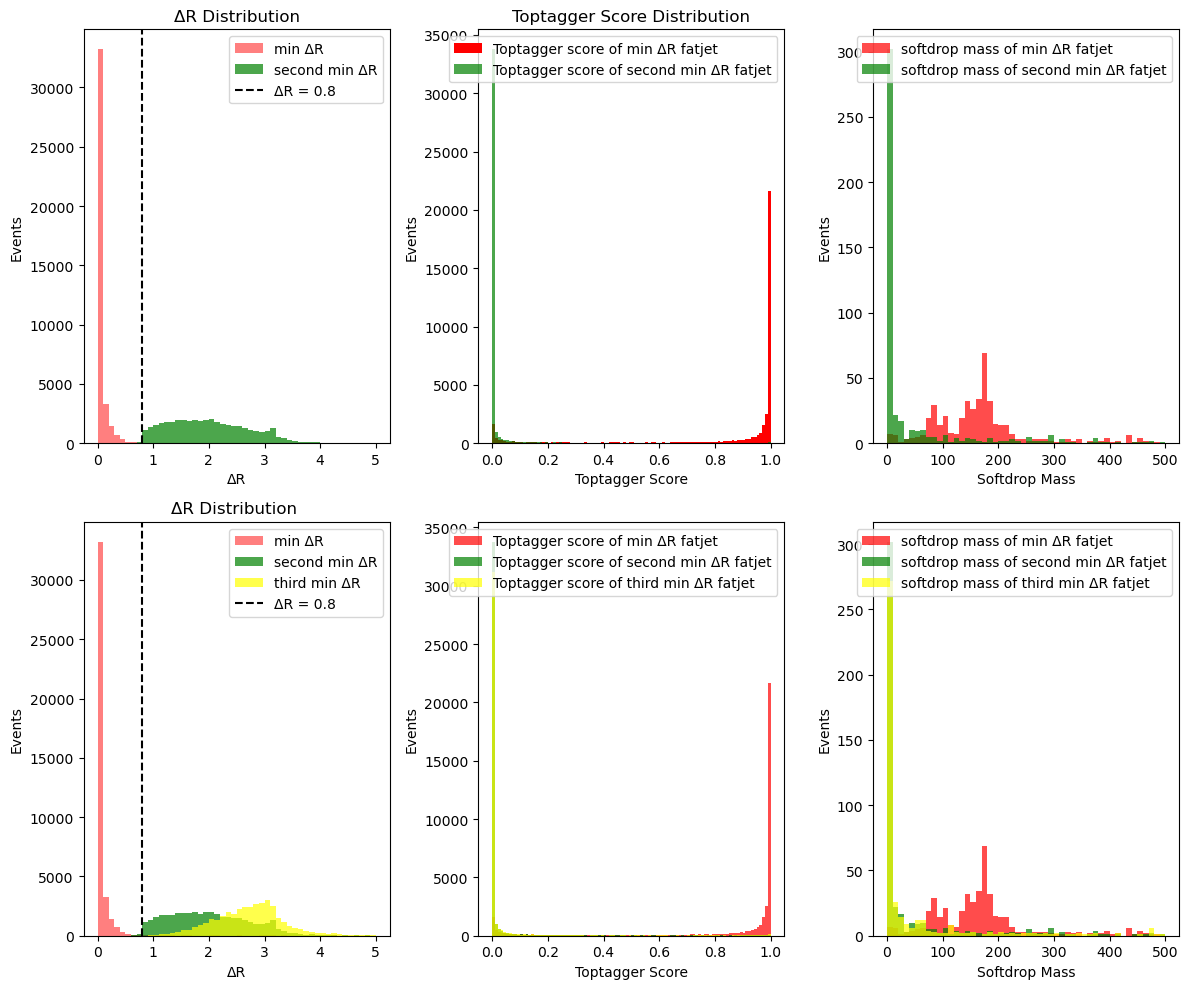

In [2]:
# leading ΔR 값만 모아서 1-D 배열로
print(len(dr_total_all))
leading_drs   = np.array([dr[0] if len(dr) else np.nan for dr in dr_total_all]) # 가장 작은 ΔR 값
nextleading_drs = np.array([dr[1] if len(dr) > 1 else np.nan for dr in dr_total_all]) #두번째로 작은 ΔR 값
third_drs = np.array([dr[2] if len(dr) > 2 else np.nan for dr in dr_total_all]) #세번째로 작은 ΔR 값
#print(leading_drs)
#print(nextleading_drs)
# leading 값을 제거하고 남은 ΔR 배열(길이가 사건마다 달라지므로 그대로 리스트 보존)
remaining_drs = [dr[1:] for dr in dr_total_all]# 가장 작은 ΔR 값을 제거한 나머지 ΔR 값들

#print(remaining_drs)
flatten_remaining_drs = ak.flatten(remaining_drs)

# ΔR 분포 subplot 추가
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs[0, 0].hist(leading_drs, bins=50, range=(0, 5), alpha=0.5, label='min ΔR', color='red')
axs[0, 0].hist(nextleading_drs, bins=50, range=(0, 5), alpha=0.7, label='second min ΔR', color='green')
axs[0, 0].axvline(x=0.8, color='black', linestyle='--', label='ΔR = 0.8')
axs[1, 0].hist(leading_drs, bins=50, range=(0, 5), alpha=0.5, label='min ΔR', color='red')
axs[1, 0].hist(nextleading_drs, bins=50, range=(0, 5), alpha=0.7, label='second min ΔR', color='green')
axs[1, 0].hist(third_drs, bins=50, range=(0, 5), alpha=0.7, label='third min ΔR', color='yellow')
axs[1 ,0].axvline(x=0.8, color='black', linestyle='--', label='ΔR = 0.8')
#axs[0, 1].hist(flatten_remaining_drs, bins=50, range=(0, 6), alpha=0.3, label='ΔR (min removed)', color='orange')
axs[0, 0].set_xlabel('ΔR')
axs[0, 0].set_ylabel('Events')
axs[0, 0].legend()
axs[0, 0].set_title('ΔR Distribution')

axs[1, 0].set_xlabel('ΔR')
axs[1, 0].set_ylabel('Events')
axs[1, 0].legend()
axs[1, 0].set_title('ΔR Distribution ')

axs[0, 1].hist(min_tagger_score_all, bins=100, range=(0, 1), alpha=1.0, label='Toptagger score of min ΔR fatjet', color='red')
axs[0, 1].hist(second_min_tagger_score_all, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of second min ΔR fatjet', color='green')
axs[1, 1].hist(min_tagger_score_all, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of min ΔR fatjet', color='red')
axs[1, 1].hist(second_min_tagger_score_all, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of second min ΔR fatjet', color='green')
axs[1, 1].hist(third_min_tagger_score_all, bins=100, range=(0, 1), alpha=0.7, label='Toptagger score of third min ΔR fatjet', color='yellow')
axs[0, 1].set_xlabel('Toptagger Score')
axs[0, 1].set_ylabel('Events')
axs[0, 1].legend()
axs[0, 1].set_title('Toptagger Score Distribution')

axs[1, 1].set_xlabel('Toptagger Score')
axs[1, 1].set_ylabel('Events')
axs[1, 1].legend()


# min, second min, third min softdrop mass subplot (axs[0,1])
axs[0, 2].hist(min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of min ΔR fatjet', color='red')
axs[0, 2].hist(second_min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of second min ΔR fatjet', color='green')
axs[0, 2].set_xlabel('Softdrop Mass')
axs[0, 2].set_ylabel('Events')
axs[0, 2].legend()
axs[1, 2].hist(min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of min ΔR fatjet', color='red')
axs[1, 2].hist(second_min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of second min ΔR fatjet', color='green')
axs[1, 2].hist(third_min_drpmass, bins=50, range=(0, 500), alpha=0.7, label='softdrop mass of third min ΔR fatjet', color='yellow')
axs[1, 2].set_xlabel('Softdrop Mass')
axs[1, 2].set_ylabel('Events')
axs[1, 2].legend()

plt.tight_layout()
plt.show()


### 빨강색 ( 가장 top 과 가까운 jet )의 soft mass 와 score 의 상관관계

/tmp/ipykernel_1339465/1211256364.py:5: RuntimeWarning: invalid value encountered in divide
  tau_divide = tau3/tau2


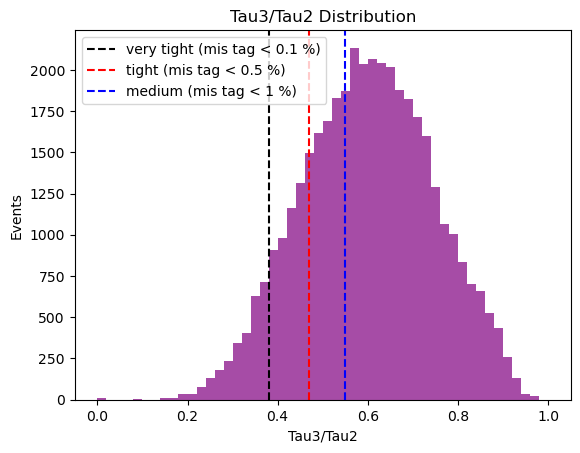

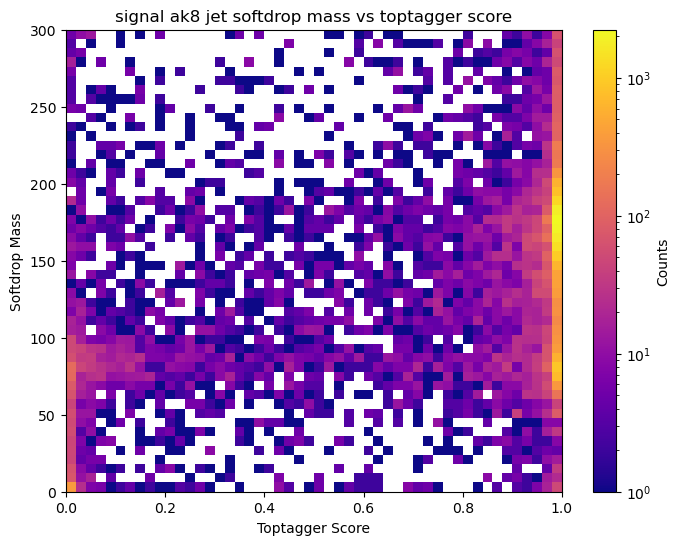

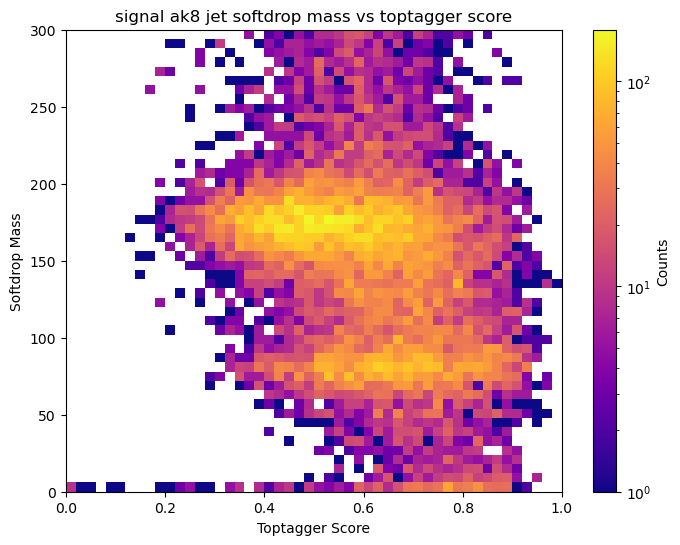

In [11]:
dropmass = min_drpmass_all
toptaggerscore = min_tagger_score_all
tau2 = np.array(tau2_list_all)
tau3 = np.array(tau3_list_all)
tau_divide = tau3/tau2
plt.hist(tau_divide, bins=50, range=(0, 1), alpha=0.7, color='purple')
plt.xlabel('Tau3/Tau2')
plt.ylabel('Events')
plt.title('Tau3/Tau2 Distribution')
plt.axvline(x=0.38, color='black', linestyle='--', label='very tight (mis tag < 0.1 %)')
plt.axvline(x=0.47, color='red', linestyle='--', label='tight (mis tag < 0.5 %)')
plt.axvline(x=0.55, color='blue', linestyle='--', label='medium (mis tag < 1 %)')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist2d(
    toptaggerscore, dropmass,
    bins=[50, 50],
    range=[[0, 1], [0, 300]],
    cmap='plasma',  # 더 명확한 색상
    norm=plt.matplotlib.colors.LogNorm(vmin=1)  # 0 아닌 값만 로그스케일로 강조
)
plt.colorbar(label='Counts')
plt.xlabel("Toptagger Score")
plt.ylabel("Softdrop Mass")
plt.title("signal ak8 jet softdrop mass vs toptagger score")
plt.show()

plt.figure(figsize=(8, 6))
plt.hist2d(
    tau_divide, dropmass,
    bins=[50, 50],
    range=[[0, 1], [0, 300]],
    cmap='plasma',  # 더 명확한 색상
    norm=plt.matplotlib.colors.LogNorm(vmin=1)  # 0 아닌 값만 로그스케일로 강조
)
plt.colorbar(label='Counts')
plt.xlabel("Toptagger Score")
plt.ylabel("Softdrop Mass")
plt.title("signal ak8 jet softdrop mass vs toptagger score")
plt.show()

## total number of lepton in single event

In [8]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm  # ✅ 진행률 표시

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_40.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
total_number = 0
muon_pt = events["Muon_pt"].array()
for i in range(len(muon_pt)):
    if len(muon_pt[i]) == 0:
        print("No muons in event", i)
        continue
    # muon pt가 있는 경우에만 출력
    print(f"Event {i} has {len(muon_pt[i])} muons with pt:", muon_pt[i])
    total_number += len(muon_pt[i])

print(total_number/499, "averge muon number per event")




Event 0 has 2 muons with pt: [1.19e+03, 779]
Event 1 has 3 muons with pt: [745, 648, 4.5]
Event 2 has 7 muons with pt: [1.58e+03, 1.02e+03, 328, 120, 114, 40.9, 8.53]
Event 3 has 6 muons with pt: [1.67e+03, 673, 40.6, 36.9, 31.8, 25.1]
Event 4 has 6 muons with pt: [1.07e+03, 513, 26.3, 25, 18.5, 13.9]
Event 5 has 4 muons with pt: [1.15e+03, 865, 137, 64.5]
Event 6 has 2 muons with pt: [863, 628]
Event 7 has 3 muons with pt: [1.67e+03, 628, 4.7]
Event 8 has 4 muons with pt: [1.13e+03, 881, 5.45, 5.3]
Event 9 has 3 muons with pt: [1.36e+03, 255, 9.25]
Event 10 has 4 muons with pt: [1.93e+03, 747, 5.08, 3.96]
Event 11 has 4 muons with pt: [1.25e+03, 1.09e+03, 89.7, 44.1]
Event 12 has 7 muons with pt: [1.78e+03, 314, 89, 49.2, 46.6, 34.4, 23.8]
Event 13 has 5 muons with pt: [1.71e+03, 1.53e+03, 609, 41.1, 32.6]
Event 14 has 4 muons with pt: [1.9e+03, 427, 28.5, 10.2]
Event 15 has 2 muons with pt: [1.63e+03, 1.16e+03]
Event 16 has 3 muons with pt: [1.19e+03, 268, 4.62]
Event 17 has 3 muons 

#### top pt 

(array([ 0.,  1., 14.,  7., 13., 17., 18., 15., 17., 27., 29., 18., 14.,
        27., 24., 17., 17., 19., 11., 16., 15., 13., 14., 11., 15., 12.,
        11., 10.,  4.,  7.,  8.,  7.,  4.,  7.,  4.,  5.,  7.,  6.,  4.,
         5.,  5.,  0.,  0.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
        1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
        1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
        2250., 2300., 2350., 2400., 2450., 2500., 2550., 2600., 2650.,
        

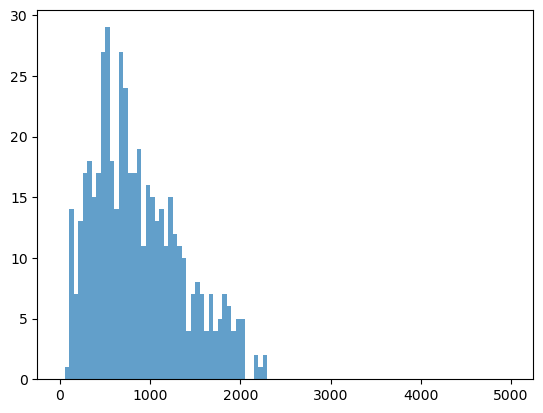

In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm  # ✅ 진행률 표시

sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_40.root"
file = uproot.open(sample)
events = file["Events"]

keys = events.keys()

def delta_phi(phi1, phi2):
    d = phi1 - phi2
    # wrap to [-π, +π]
    return (d + np.pi) % (2*np.pi) - np.pi

def delta_r(deta, dphi):
    return np.sqrt(d_eta**2 + d_phi**2)


## gen part 관련 정보
gen_pdgid = events["GenPart_pdgId"].array()
gen_pt = events["GenPart_pt"].array()
gen_eta = events["GenPart_eta"].array()
gen_phi = events["GenPart_phi"].array()

topmask = (gen_pdgid == 6) | (gen_pdgid == -6)
top_pt = gen_pt[topmask]
top_pt = top_pt[:,0]
top_pts = np.array(top_pt).flatten()

plt.hist(top_pts, bins=100, range=(0, 5000), alpha=0.7, label='Top PT Distribution')